In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

c:\Users\Kaleb\OneDrive\Desktop\insurance-risk-modeling\acis-insurance-risk-modeling\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Full path to the file
file_path = r"C:\Users\Kaleb\OneDrive\Desktop\insurance-risk-modeling\acis-insurance-risk-modeling\data\cleaned_insurance_data.csv"


In [4]:
df = pd.read_csv(file_path)

In [38]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'HasClaim', 'Month',
       'Year'],
      dtype='object')

In [5]:
# 📌 Step 3: Filter Only Records with Claims > 0
df_claims = df[df['TotalClaims'] > 0].copy()

In [6]:
# 📊 Step 4: Select Relevant Features
feature_cols = [
    'IsVATRegistered', 'LegalType', 'Language', 'Bank', 'AccountType',
    'MaritalStatus', 'Gender', 'Province', 'ItemType', 'VehicleType',
    'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
    'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate',
    'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
    'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'SumInsured',
    'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected'
]

In [7]:
df_claims = df_claims.dropna(subset=feature_cols + ['TotalClaims'])

In [8]:
# 🔁 Step 6: Encode Categorical Features using One-Hot Encoding
df_encoded = pd.get_dummies(df_claims[feature_cols], drop_first=True)

In [9]:
# 🎯 Step 7: Prepare Features (X) and Target (y)
X = df_encoded
y = df_claims['TotalClaims']

In [10]:
# 🧪 Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# 🤖 Step 9: Define Models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [12]:
# 📈 Step 10: Train and Evaluate Models
results = {}
for name, model in models.items():
    if name == 'XGBoost':
        model.fit(X_train.values, y_train.values)
        preds = model.predict(X_test.values)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name} ➤ RMSE: {rmse:.2f}, R2: {r2:.2f}")


LinearRegression ➤ RMSE: 3603.80, R2: 0.37
RandomForest ➤ RMSE: 3608.38, R2: 0.37
XGBoost ➤ RMSE: 3772.58, R2: 0.31


In [13]:
# 📊 Step 11: SHAP Analysis for Best Model (XGBoost Assumed)
best_model = models['XGBoost']
X_test_np = X_test.values.astype(float)  # Ensure it's float64
explainer = shap.Explainer(best_model, X_test_np)
shap_values = explainer(X_test_np)


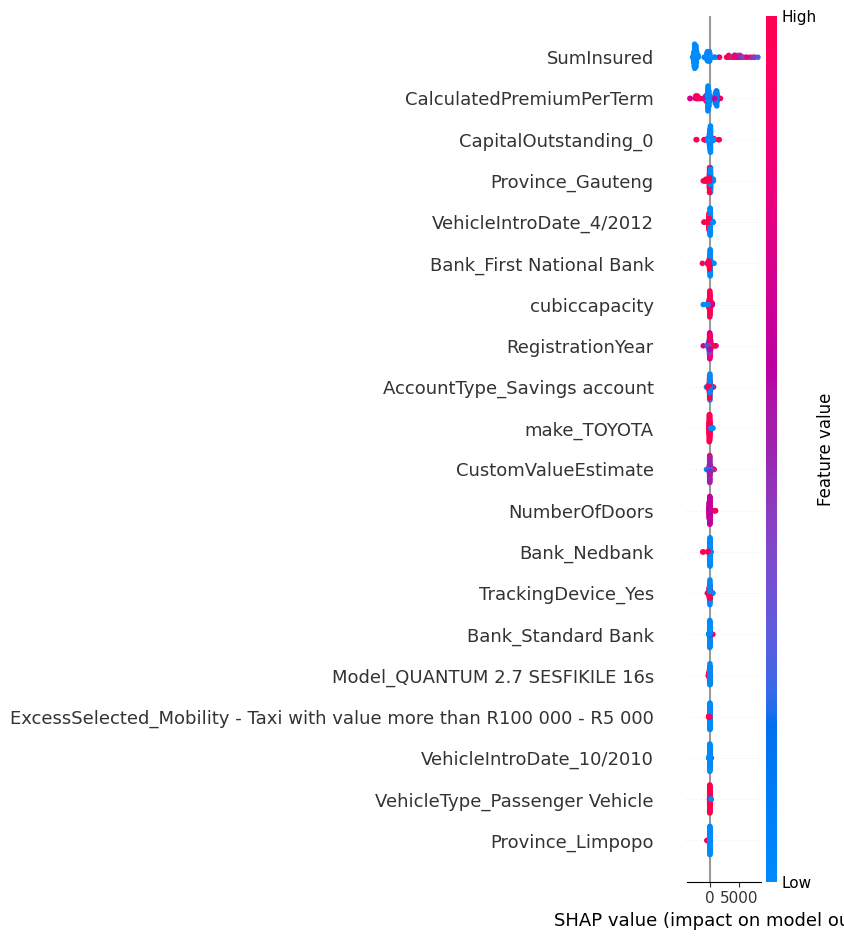

In [ ]:
# Summary plot (still use X_test for feature name)
shap.summary_plot(shap_values, X_test, show=True)

In [16]:
import joblib
import os

# Define the save path
model_path = r"C:\Users\Kaleb\OneDrive\Desktop\insurance-risk-modeling\acis-insurance-risk-modeling\models\claims_model.pkl"

# Save the model
joblib.dump(best_model, model_path)

print(f"Model saved to: {model_path}")


Model saved to: C:\Users\Kaleb\OneDrive\Desktop\insurance-risk-modeling\acis-insurance-risk-modeling\models\claims_model.pkl
